In [16]:
# Name: Manisha Lakkarsu
# id: 700746573

In [12]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.constraints import MaxNorm
from tensorflow.keras.utils import to_categorical
from keras.optimizers import SGD

# Fix random seed for reproducibility
np.random.seed(7)

# Load data
(a_train, b_train), (a_test, b_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
a_train = a_train.astype('float32') / 255.0
a_test = a_test.astype('float32') / 255.0

# One hot encode outputs
b_train = to_categorical(b_train)
b_test = to_categorical(b_test)
num_classes = b_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 5
lRate = 0.01
decay_rate = lRate / epochs
sgd = SGD(learning_rate=lRate, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history = model.fit(a_train, b_train, validation_data=(a_test, b_test), epochs=epochs, batch_size=32)

# Evaluate the model
scores = model.evaluate(a_test, b_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_18 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_19 (Dropout)        (None, 16, 16, 64)        0         
                                                      

In [13]:
# Predict the first 4 images of the test data
predictions = model.predict(a_test[:4])

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert the actual labels to class labels
actual_labels = np.argmax(b_test[:4], axis=1)

# Print the predicted and actual labels for the  first 4 images
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)

1/1 [==============================] - 0s 450ms/step
Predicted labels: [3 1 8 0]
Actual labels: [3 8 8 0]


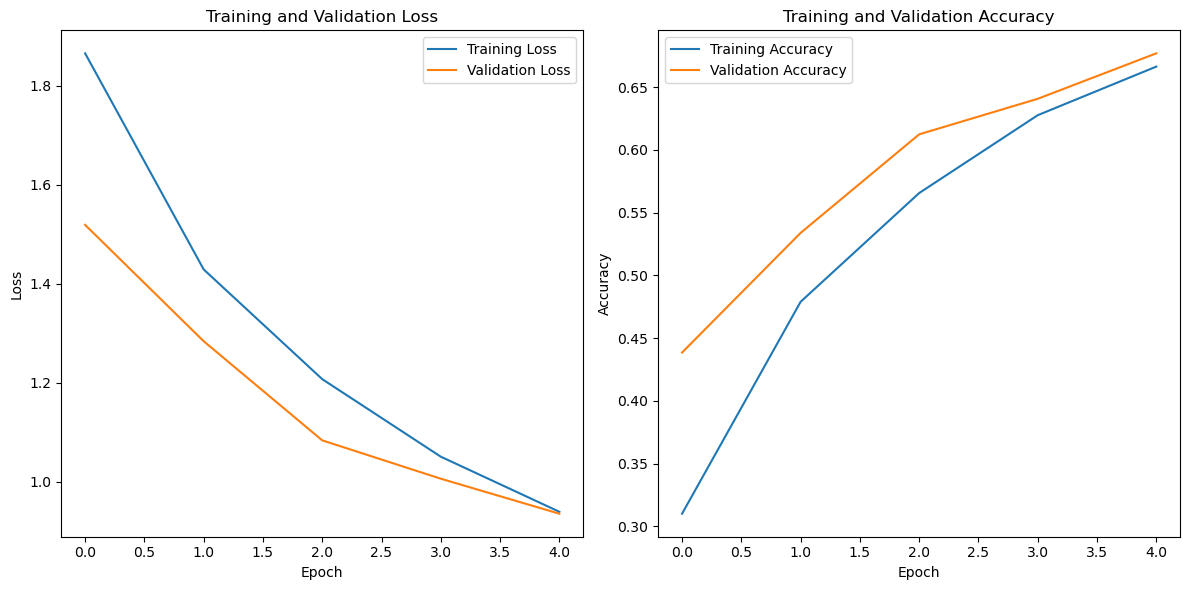

In [15]:
import matplotlib.pyplot as pplt

# Plot the training and validation loss
pplt.figure(figsize=(12, 6))
pplt.subplot(1, 2, 1)
pplt.plot(history.history['loss'], label='Training Loss')
pplt.plot(history.history['val_loss'], label='Validation Loss')
pplt.xlabel('Epoch')
pplt.ylabel('Loss')
pplt.title('Training and Validation Loss')
pplt.legend()

# Plot the training and validation accuracy
pplt.subplot(1, 2, 2)
pplt.plot(history.history['accuracy'], label='Training Accuracy')
pplt.plot(history.history['val_accuracy'], label='Validation Accuracy')
pplt.xlabel('Epoch')
pplt.ylabel('Accuracy')
pplt.title('Training and Validation Accuracy')
pplt.legend()

pplt.tight_layout()
pplt.show()